In [1]:
from htke.load_data import *
from htke.process_ir_data import *
from htke.load_conditions import *
from htke.spka import *
from htke.rpka import *
pd.options.mode.chained_assignment = None  # default='warn' stops the slice error

### Go to directory

In [2]:
%pwd
%cd ir_data\GL-06-50

C:\Users\Paul Dingwall\Documents\github\htke\ir_data\GL-06-50


### Load Raw Data

<AxesSubplot:xlabel='Relative Time'>

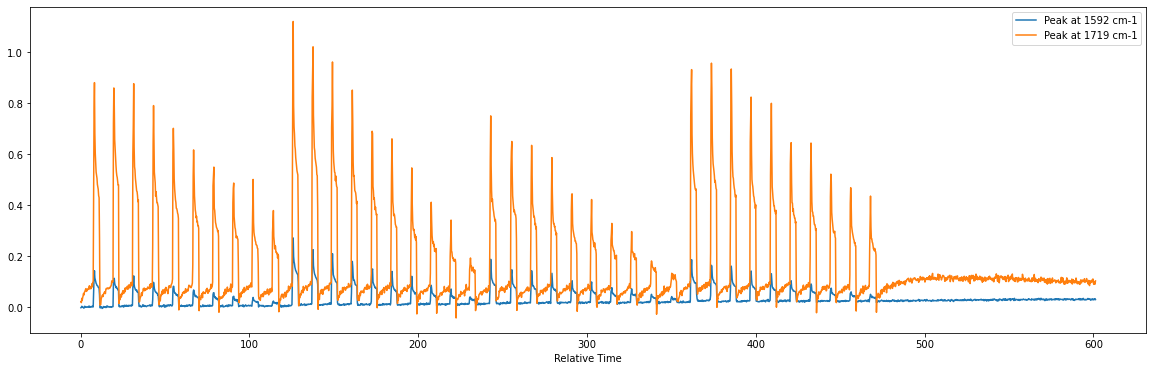

In [3]:
# Instantiate class
Data()

# Load data to dataframe
ir_data = Data.read()

# Visualise the data
Data.plot(ir_data)

#ir_data

### Find the Peaks in the Raw Data

In [4]:
# List all the wavelengths observed
print([col for col in ir_data.columns if 'Peak' in col])

['Peak at 1592 cm-1', 'Peak at 1719 cm-1']


In [5]:
# Choose peak
peak_of_interest = 'Peak at 1592 cm-1'

In [6]:
# Correct Baseline (if needed)
correction = Data.baseline_correction(ir_data[peak_of_interest])

ir_data[peak_of_interest] = ir_data[peak_of_interest] - correction

In [7]:
# Instantiate class
peaks = Peaks(ir_data)

# Auto find prominence and height to match number of conditions
prominence, no_reactions = peaks.auto_prom(peak_of_interest)
height = peaks.auto_height(peak_of_interest)
residence_time = peaks.auto_area(peak_of_interest, prominence, no_reactions, 10)

print('There are', no_reactions, 'reactions')
print('Prominence threshold =', np.round(prominence, 4))
print('Height threshold =', np.round(height, 4))
print('Residence time =', np.round(residence_time, 2))

There are 4 reactions
Prominence threshold = 0.0127
Height threshold = 1.0
Residence time = 4.44


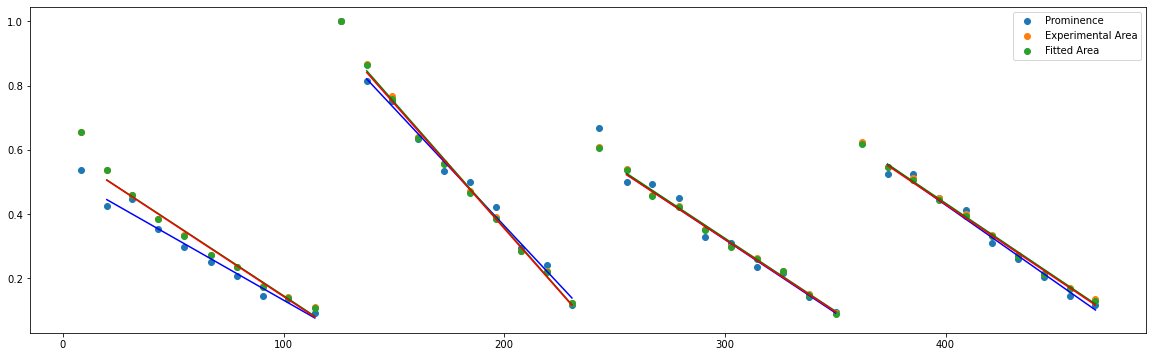

In [8]:
#residence_time=9
#prominence = 0.004
## PROMINENCE ALL WAVELENGTHS: Determine the peak prominences of every wavelength
#processed_ir_data = peaks.prominence_all(prominence)

## PROMINENCE: Determine the peak prominences of a single wavelength
#processed_ir_data = peaks.prominence(prominence, peak_of_interest)

## HEIGHT: # Determine the peak heights of a single wavelength
#processed_ir_data = peaks.height(height, peak_of_interest)

## EXP AREA: Determine the experimental areas of a single wavelength
processed_ir_data = peaks.exp_area(prominence, residence_time, peak_of_interest,0,3)

## FITTED AREA - SINGLE PEAK: Fit a gaussian to a single peak and determine it's area
#processed_ir_data= peaks.fitted_area_sp(prominence, residence_time, peak_of_interest, 0, 2, 2)

## FITTED AREA: Determine the fitted areas of a single wavelength
#processed_ir_data = peaks.fitted_area(prominence, residence_time, peak_of_interest)

## Visualise which peaks have been picked - single peak
#peaks.plot(processed_ir_data, peak_of_interest)

## Compare prominence, height, experimental area, and fitted area
r2, compare = peaks.compare_no_height(prominence, residence_time, peak_of_interest, no_reactions, 10,0,3)
# NOTE: Areas seem to give the best value when the starting point is exactly on the peak (no baseline before)

#processed_ir_data
#r2

In [9]:
Conditions()

In [10]:
thing = peaks.linear_correction(processed_ir_data,4,10)
thing

,Relative Time,Peak Property,Method,Raw Peak Property
0,8.183333,1.050396,experimental area,1.050396
1,19.916667,0.810176,experimental area,0.860505
2,31.433333,0.727213,experimental area,0.737130
3,43.183333,0.642570,experimental area,0.617213
4,54.916667,0.558047,experimental area,0.534245
5,66.916667,0.471603,experimental area,0.436440
6,78.933333,0.385038,experimental area,0.376153
7,90.683333,0.300395,experimental area,0.279390
8,102.166667,0.217673,experimental area,0.227225
9,114.183333,0.131108,experimental area,0.175521


# Manual Attempt

In [ ]:
# Choose just one reaction
rxn = processed_ir_data.iloc[1:10,0:3]
rxn

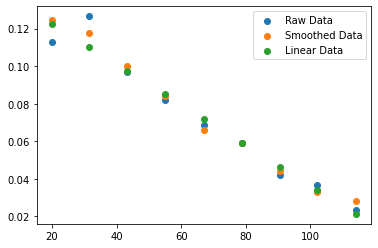

In [10]:
# Try Savitzky-Golay filter
from scipy import signal
y_smooth = signal.savgol_filter(rxn['Peak Property'], window_length=11, polyorder=6, mode="mirror")
rxn['Smoothed Data'] = y_smooth

# Create line of best fit
a,b = np.polyfit(rxn['Relative Time'], rxn['Peak Property'],1)
rxn['Linear Data'] = a*rxn['Relative Time'] + b

# Plot
plt.scatter(rxn['Relative Time'], rxn['Peak Property'], label='Raw Data')
plt.scatter(rxn['Relative Time'], rxn['Smoothed Data'], label='Smoothed Data')
plt.scatter(rxn['Relative Time'], rxn['Linear Data'], label='Linear Data')
plt.legend()
plt.show()

In [11]:
no_reactions = 4
points_per_reaction = 10

rxn = processed_ir_data[['Relative Time','Peak Property']]

df = []
for var in range(0, no_reactions * points_per_reaction, points_per_reaction):
    # Find linear fit
    a,b = np.polyfit(rxn.iloc[1+var:10+var,0], rxn.iloc[1+var:10+var,:],1)
    # Create the smoothed y data
    best_fit_line = []
    best_fit_line = a[1] * rxn.iloc[1+var:10+var,0] + b[1]
    # Add the t0 in
    best_fit_line = pd.concat([pd.Series(rxn.iloc[var,1]),best_fit_line])
    # Append to list
    df.append(best_fit_line)
    
linearised_data = pd.concat(df).reset_index(drop=True)

# Save the raw data
processed_ir_data['Raw Peak Property'] = processed_ir_data['Peak Property']
# Overwrite raw data and add linear best fit to dataframe
processed_ir_data['Peak Property'] = linearised_data
processed_ir_data

,Relative Time,Peak Property,Method
0,8.183333,0.147058,prominence
1,19.916667,0.122480,prominence
2,31.433333,0.110123,prominence
3,43.183333,0.097516,prominence
4,54.916667,0.084926,prominence
5,66.916667,0.072050,prominence
6,78.933333,0.059157,prominence
7,90.683333,0.046549,prominence
8,102.166667,0.034228,prominence
9,114.183333,0.021334,prominence


# Read experimental conditions and add to dataframe

In [60]:
Conditions()
experimental_data = Conditions.read(compare)
#experimental_data

Inputs seem good: IR Datapoints =  40 , Number of conditions =  40


### Create the SPKA profiles

In [61]:
spka = SPKA(experimental_data)

,Prominence,Experimental Area,Fitted Area,Reaction
0,0.637837,0.842916,0.837756,Exp1 - R1
1,0.855472,0.817684,0.833234,Exp1 - R2
2,0.811285,0.845066,0.838916,Exp1 - R3
3,0.519870,0.893438,0.910441,Exp1 - R4
Sum,2.824465,3.399104,3.420348,Sum


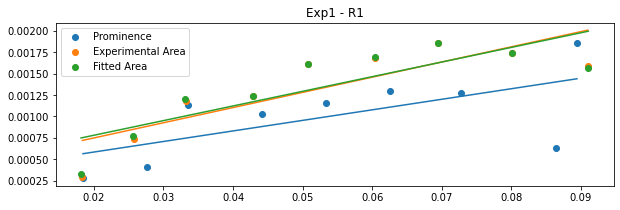

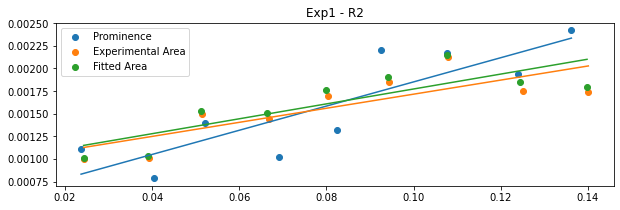

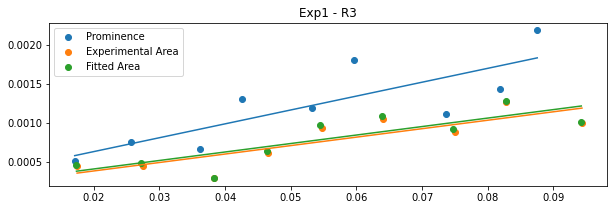

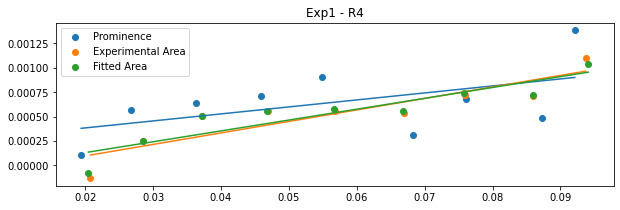

In [64]:
#spka_data = spka.spka('[A]0')
#spka_data
#spka.plot(spka_data)

## To Compare - must use Conditions.read(compare)
r2 = spka.compare('[A]0')
r2

### Perform RPKA

In [15]:
rpka = RPKA(spka_data)

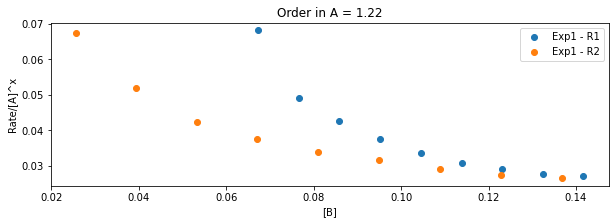

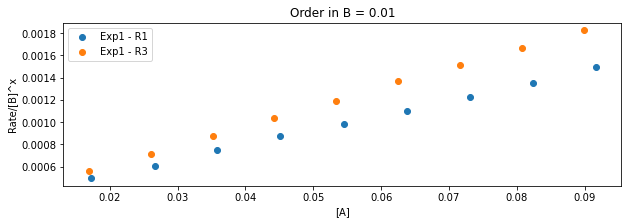

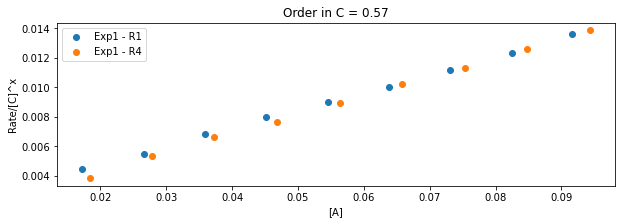

In [16]:
rpka_data = rpka.diff_excess()
#rpka_data

In [55]:
# Set up excelwriter
writer = pd.ExcelWriter('GL-06-50 - Processed - ' 
                        + peak_of_interest[8:12] + ' - ' + # Adds Peak
                        processed_ir_data['Method'][0] # Adds the methods used (prominence, area, etc)
                        + ' - No Baseline - Linear Smooth.xlsx', engine='xlsxwriter')
workbook=writer.book

# Output data
rpka_data.to_excel(writer, sheet_name='RPKA Data', startrow=0 , startcol=0, index=False)
spka_data.to_excel(writer, sheet_name='SPKA Data', startrow=0 , startcol=0, index=False)
ir_data.to_excel(writer, sheet_name='IR Data', startrow=0 , startcol=0, index=False)
processed_ir_data.to_excel(writer, sheet_name='Processed IR', startrow=0 , startcol=0, index=False)
experimental_data.to_excel(writer, sheet_name='Experimental Data', startrow=0 , startcol=0, index=False)
#conditions.to_excel(writer, sheet_name='Conditions', startrow=0 , startcol=0, index=False)

# Save
writer.save()

# This won't work if the excel file is open